# Examples
### 1
Apply a production to a graph.

frozenset({Edge(type=EdgeType.E, vertices=frozenset({'B', 'C'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'D', 'C'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'D', 'A'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'B', 'A'}), parameters={}), Edge(type=EdgeType.Q, vertices=frozenset({'B', 'A', 'D', 'C'}), parameters={'R': 1})})


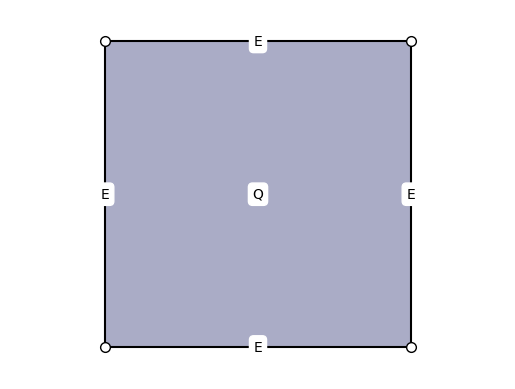

In [1]:
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_0 import Prod0

hg = Hypergraph()
hg.add_edge(Edge(EdgeType.E, frozenset({"A", "B"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"B", "C"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"C", "D"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "A"})))
hg.add_edge(Edge(EdgeType.Q, frozenset({"A", "B", "C", "D"}), {"R": 0}))

hg.set_vertex_parameter("A", {"x": 0, "y": 0})
hg.set_vertex_parameter("B", {"x": 1, "y": 0})
hg.set_vertex_parameter("C", {"x": 1, "y": 1})
hg.set_vertex_parameter("D", {"x": 0, "y": 1})

prod0 = Prod0()
new_hg = prod0.apply(hg)
if new_hg:
    print(new_hg.get_edges())
    new_hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")

frozenset({Edge(type=EdgeType.E, vertices=frozenset({'B', 'C'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'D', 'E'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'B', 'A'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'D', 'C'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'G', 'F'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'G'}), parameters={}), Edge(type=EdgeType.T, vertices=frozenset({'D', 'G', 'C', 'B', 'A', 'E', 'F'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'E', 'F'}), parameters={})})


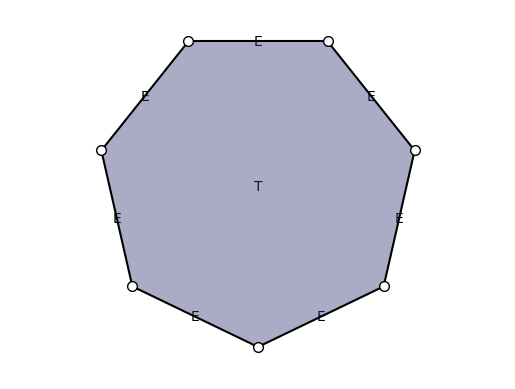

In [2]:
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_12 import Prod12
import math

hg = Hypergraph()

# Create 7 vertices forming a regular septagon
# Calculate positions for vertices on a circle
vertices = ["A", "B", "C", "D", "E", "F", "G"]
center_x, center_y = 0.5, 0.5
radius = 0.5

# Add E edges forming a septagonal cycle
for i in range(7):
    v1 = vertices[i]
    v2 = vertices[(i + 1) % 7]
    hg.add_edge(Edge(EdgeType.E, frozenset({v1, v2})))

# Add T edge with R=0
hg.add_edge(Edge(EdgeType.T, frozenset({"A", "B", "C", "D", "E", "F", "G"}), {"R": 0}))

# Set vertex positions as regular septagon
for i, vertex in enumerate(vertices):
    angle = 2 * math.pi * i / 7 - math.pi / 2  # Start from top
    x = center_x + radius * math.cos(angle)
    y = center_y + radius * math.sin(angle)
    hg.set_vertex_parameter(vertex, {"x": x, "y": y})

prod12 = Prod12()
new_hg = prod12.apply(hg)
if new_hg:
    print(new_hg.get_edges())
    new_hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")

Before breaking:
frozenset({Edge(type=EdgeType.E, vertices=frozenset({'G5', 'F'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'D', 'G4'}), parameters={}), Edge(type=EdgeType.S, vertices=frozenset({'B', 'A', 'E', 'D', 'C', 'F'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'G1', 'A'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'D', 'G3'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'G5', 'E'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'G4', 'E'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'G6', 'F'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'B', 'G2'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'G6'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'G2', 'C'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'G3', 'C'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'B', 'G1'}), parameters={})})


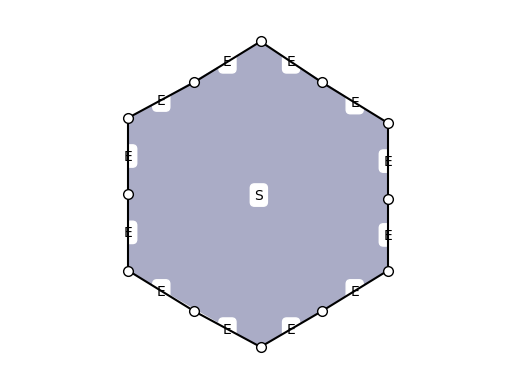

In [9]:
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_11 import Prod11
import math

hg = Hypergraph()

# Create 6 vertices forming a regular hexagon (original S vertices)
vertices = ["A", "B", "C", "D", "E", "F"]
center_x, center_y = 0.5, 0.5
radius = 0.3

# Create 6 intermediate vertices (breaking vertices)
intermediates = ["G1", "G2", "G3", "G4", "G5", "G6"]

# Set positions for hexagon vertices
for i, vertex in enumerate(vertices):
    angle = 2 * math.pi * i / 6 - math.pi / 2  # Start from top
    x = center_x + radius * math.cos(angle)
    y = center_y + radius * math.sin(angle)
    hg.set_vertex_parameter(vertex, {"x": int(x * 100), "y": int(y * 100)})

# Set positions for intermediate vertices (on the line between consecutive hexagon vertices)
for i, intermediate in enumerate(intermediates):
    # Position on the line between vertices[i] and vertices[(i+1)%6]
    v1_params = hg.get_vertex_parameters(vertices[i])
    v2_params = hg.get_vertex_parameters(vertices[(i + 1) % 6])
    # Place at midpoint of the line connecting v1 and v2
    mid_x = (v1_params["x"] + v2_params["x"]) // 2
    mid_y = (v1_params["y"] + v2_params["y"]) // 2
    hg.set_vertex_parameter(intermediate, {"x": mid_x, "y": mid_y})

# Add E edges from each hexagon vertex to its two adjacent intermediates
for i in range(6):
    v = vertices[i]
    g1 = intermediates[i]
    g2 = intermediates[(i - 1) % 6]
    hg.add_edge(Edge(EdgeType.E, frozenset({v, g1})))
    hg.add_edge(Edge(EdgeType.E, frozenset({v, g2})))

# Add S hyperedge with R=1 (marked for refinement)
hg.add_edge(Edge(EdgeType.S, frozenset(vertices), {"R": 1}))


print("Before breaking:")
print(hg.get_edges())
hg.draw(use_positional_parameters=True)


After breaking:
frozenset({Edge(type=EdgeType.Q, vertices=frozenset({'G5', 'M0', 'G6', 'F'}), parameters={'R': 0}), Edge(type=EdgeType.Q, vertices=frozenset({'M0', 'G3', 'G4', 'D'}), parameters={'R': 0}), Edge(type=EdgeType.E, vertices=frozenset({'G1', 'A'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'D', 'G3'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'G5', 'E'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'M0', 'G3'}), parameters={'B': 0}), Edge(type=EdgeType.E, vertices=frozenset({'G2', 'C'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'G3', 'C'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'M0', 'G4'}), parameters={'B': 0}), Edge(type=EdgeType.E, vertices=frozenset({'G5', 'M0'}), parameters={'B': 0}), Edge(type=EdgeType.E, vertices=frozenset({'B', 'G1'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'G5', 'F'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'D', 'G4'}), paramete

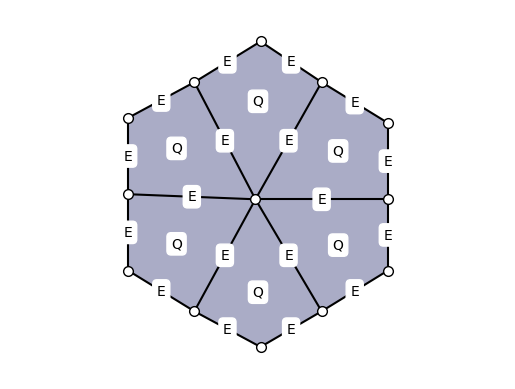

In [10]:
# Apply production P11 to break the hexagon
prod11 = Prod11()
new_hg = prod11.apply(hg)

if new_hg:
    print("\nAfter breaking:")
    print(new_hg.get_edges())
    new_hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")

### 2
Create a criterion to choose an edge to which a production should be applied.

frozenset({Edge(type=EdgeType.Q, vertices=frozenset({'E', 'C', 'F', 'D'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'B'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'F', 'D'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'C', 'B'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'D'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'E', 'F'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'C', 'D'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'E', 'C'}), parameters={}), Edge(type=EdgeType.Q, vertices=frozenset({'C', 'A', 'D', 'B'}), parameters={'R': 0})})
Production could not be applied.


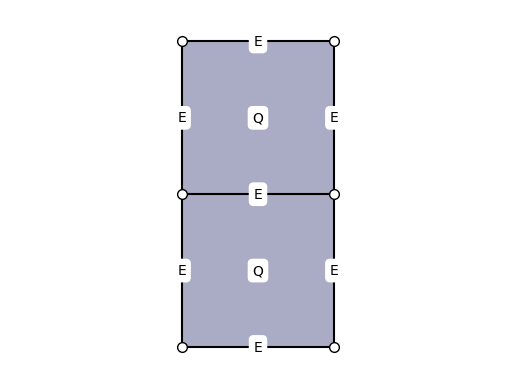

In [7]:
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_0 import Prod0
from typing import Any, Mapping, Optional, List
from shapely.geometry import Point, MultiPoint

# create an rfc to stop applying the production to random edges
class BlockingRFC:
    def is_valid(self, edge: Edge, hypergraph: Hypergraph, meta: Optional[Mapping[str, Any]] = None) -> bool:
        return False

# create an rfc for a production applying only for specified edge
class EdgeRFC:

    def __init__(self, edge: Edge):
        self._edge = edge

    def is_valid(self, edge: Edge, hypergraph: Hypergraph, meta: Optional[Mapping[str, Any]] = None) -> bool:
        return self._edge == edge

hg = Hypergraph(rfc=BlockingRFC())
hg.add_edge(Edge(EdgeType.E, frozenset({"A", "B"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"B", "C"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"C", "D"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "A"})))
hg.add_edge(Edge(EdgeType.Q, frozenset({"A", "B", "C", "D"}), {"R": 0}))

hg.add_edge(Edge(EdgeType.E, frozenset({"C", "E"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "F"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"E", "F"})))
hg.add_edge(Edge(EdgeType.Q, frozenset({"C", "D", "E", "F"}), {"R": 0}))

hg.set_vertex_parameter("A", {"x": 0, "y": 0})
hg.set_vertex_parameter("B", {"x": 1, "y": 0})
hg.set_vertex_parameter("C", {"x": 1, "y": 1})
hg.set_vertex_parameter("D", {"x": 0, "y": 1})
hg.set_vertex_parameter("E", {"x": 1, "y": 2})
hg.set_vertex_parameter("F", {"x": 0, "y": 2})

# apply rfc to specified edge
prod0 = Prod0(rfc=EdgeRFC(Edge(EdgeType.Q, frozenset({"C", "D", "E", "F"}), {"R": 0})))
new_hg = prod0.apply(hg)
if new_hg:
    print(new_hg.get_edges())
    new_hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")

# try applying the production again
new_hg = prod0.apply(new_hg)
if new_hg:
    print(new_hg.get_edges())
    new_hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")

# the second production will not be applied because of the BlockingRFC

### 3
Creating a criterion using parameters to decide which edge the production should be applied to.
The criterion is that if a point is inside a polygon defined by the hyperedge Q than that edge is refined.

frozenset({Edge(type=EdgeType.Q, vertices=frozenset({'E', 'C', 'F', 'D'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'B'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'F', 'D'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'C', 'B'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'D'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'E', 'F'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'C', 'D'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'E', 'C'}), parameters={}), Edge(type=EdgeType.Q, vertices=frozenset({'C', 'A', 'D', 'B'}), parameters={'R': 0})})
Production could not be applied.


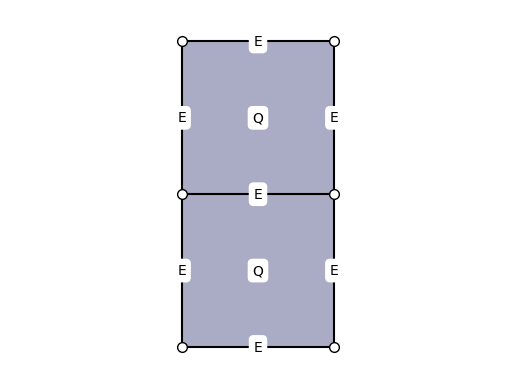

In [6]:
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_0 import Prod0
from typing import Any, Mapping, Optional, List
from shapely.geometry import Point, MultiPoint

class CustomRFC:

    def __init__(self, points: List[Point]):
        self._points = points

    def is_valid(self, edge: Edge, hypergraph: Hypergraph, meta: Optional[Mapping[str, Any]] = None) -> bool:

        if not self._points:
            return False

        params = map(lambda v: hypergraph.get_vertex_parameters(v), edge.get_vertices())
        polygon_points = list(map(lambda p: Point(p['x'], p['y']), params))

        polygon = MultiPoint(polygon_points).convex_hull
        res  = polygon.contains(self._points[-1])

        if res:
            self._points.pop()
            return True

        return False

hg = Hypergraph(rfc=CustomRFC([Point(0.5, 1.5), Point(0.5, 1.5)]))
hg.add_edge(Edge(EdgeType.E, frozenset({"A", "B"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"B", "C"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"C", "D"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "A"})))
hg.add_edge(Edge(EdgeType.Q, frozenset({"A", "B", "C", "D"}), {"R": 0}))

hg.add_edge(Edge(EdgeType.E, frozenset({"C", "E"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "F"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"E", "F"})))
hg.add_edge(Edge(EdgeType.Q, frozenset({"C", "D", "E", "F"}), {"R": 0}))

hg.set_vertex_parameter("A", {"x": 0, "y": 0})
hg.set_vertex_parameter("B", {"x": 1, "y": 0})
hg.set_vertex_parameter("C", {"x": 1, "y": 1})
hg.set_vertex_parameter("D", {"x": 0, "y": 1})
hg.set_vertex_parameter("E", {"x": 1, "y": 2})
hg.set_vertex_parameter("F", {"x": 0, "y": 2})

# apply prod0 anch check if the proper edge was refined
prod0 = Prod0()
hg = prod0.apply(hg)
if hg:
    print(hg.get_edges())
    hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")

# check whether the production is not applied again
prod0 = Prod0()
hg = prod0.apply(hg)
if hg:
    print(hg.get_edges())
    hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")